In [23]:
from machine_learning.ml_dataset import MLDataset
from utils.paths import Paths
from facades import EvaluationFacade
from datetime import datetime

lasso56 = MLDataset.from_files(f'{Paths.ML_DATASETS_FOLDER}/56sectors_LASSO_learned_in_250702')
lgbm56 = MLDataset.from_files(f'{Paths.ML_DATASETS_FOLDER}/56sectors_LightGBMlearned_in_250702')
lasso48 = MLDataset.from_files(f'{Paths.ML_DATASETS_FOLDER}/48sectors_LASSO_learned_in_250702')
lgbm48 = MLDataset.from_files(f'{Paths.ML_DATASETS_FOLDER}/48sectors_LightGBMlearned_in_250702')
en48 = MLDataset.from_files(f'{Paths.ML_DATASETS_FOLDER}/48sectors_Ensembled_learned_in_250702')

In [8]:
ef48 = EvaluationFacade(lgbm48.pred_result_df,
                        lgbm48.raw_returns_df, 
                        start_day = datetime(2022, 1, 1), 
                        end_day = datetime(2025, 12, 31),
                        trade_sector_num=2,
                        bin_num=5)
ef48.display()

c:\Users\ryosh\enrich_me\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\ryosh\enrich_me\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


読み込みが完了しました。
全期間
母集団の推定（99.7%）
平均リターン: 0.1353% (worst: 0.067%, best: 0.2035%)
標準偏差: 0.006715 (worst:0.007229, best:0.006263)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.201432 (worst:0.092718, best:0.324897)
最大ドローダウン: 7.5002% (worst:17.5434%, best:4.3372%)
最大ドローダウン日数: 222日 (worst:1047日, best:85日)
----------------------------------------------------------------------------------
直近1年
母集団の推定（99.7%）
平均リターン: 0.1137% (worst: -0.0209%, best: 0.2483%)
標準偏差: 0.00713 (worst:0.008202, best:0.006288)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.159512 (worst:-0.025454, best:0.394944)
最大ドローダウン: 10.0571% (worst:-72.5009%, best:3.5823%)
最大ドローダウン日数: 354日 (worst:13891日, best:58日)
----------------------------------------------------------------------------------
直近3ヶ月
母集団の推定（99.7%）
平均リターン: 0.1546% (worst: -0.1394%, best: 0.4486%)
標準偏差: 0.007552 (worst:0.010186, best:0.005938)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.204721 (worst:-0.136802, best:0

Output()

In [25]:
ef56 = EvaluationFacade(lasso56.pred_result_df,
                        lasso56.raw_returns_df, 
                        start_day = datetime(2022, 1, 1), 
                        end_day = datetime(2025, 12, 31),
                        trade_sector_num=2,
                        bin_num=5)
ef56.display()

c:\Users\ryosh\enrich_me\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\ryosh\enrich_me\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


読み込みが完了しました。
全期間
母集団の推定（99.7%）
平均リターン: 0.099% (worst: 0.0515%, best: 0.1466%)
標準偏差: 0.004683 (worst:0.005042, best:0.004368)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.211483 (worst:0.102053, best:0.335673)
最大ドローダウン: 4.9825% (worst:11.1165%, best:2.9279%)
最大ドローダウン日数: 201日 (worst:864日, best:80日)
----------------------------------------------------------------------------------
直近1年
母集団の推定（99.7%）
平均リターン: 0.0502% (worst: -0.0311%, best: 0.1315%)
標準偏差: 0.004305 (worst:0.004953, best:0.003797)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.116548 (worst:-0.062803, best:0.346226)
最大ドローダウン: 8.3115% (worst:-17.7431%, best:2.4675%)
最大ドローダウン日数: 663日 (worst:2282日, best:75日)
----------------------------------------------------------------------------------
直近3ヶ月
母集団の推定（99.7%）
平均リターン: 0.0388% (worst: -0.1153%, best: 0.1929%)
標準偏差: 0.003959 (worst:0.00534, best:0.003113)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.098003 (worst:-0.215923, best:0.61

Output()

In [19]:
import pandas as pd
df48 = ef48.met_calc.metrics_dfs['日次成績'][['LS']].rename(columns={'LS': 'Sector48'})
df56 = ef56.met_calc.metrics_dfs['日次成績'][['LS']].rename(columns={'LS': 'Sector56'})
df = pd.concat([df48, df56], axis=1)
df['Ensemble'] = (df['Sector48'] + df['Sector56'] * 2) / 3
agg_df = df.describe().T
agg_df['SR'] = agg_df['mean'] / agg_df['std']
agg_df = agg_df.T
display(agg_df)

,Sector48,Sector56,Ensemble
count,857.000000,857.000000,857.000000
mean,0.001353,0.000990,0.001111
std,0.006715,0.004683,0.004437
min,-0.024614,-0.019830,-0.016335
25%,-0.002685,-0.001803,-0.001523
50%,0.000979,0.000638,0.000722
75%,0.005479,0.003512,0.003573
max,0.035317,0.022203,0.023520
SR,0.201432,0.211483,0.250439


In [ ]:
df48 = ef48.met_calc.metrics_dfs['日次成績'][['LS']].rename(columns={'LS': 'Sector48'})
df56 = ef56.met_calc.metrics_dfs['日次成績'][['LS']].rename(columns={'LS': 'Sector56'})
extracted_result = pd.read_csv(r'C:\Users\ryosh\enrich_me\project\execution_scripts\experimental\個別銘柄とファクターの比較検討\extracted_result.csv')
extracted_result['Date'] = pd.to_datetime(extracted_result['Date'])
extracted_result = extracted_result.rename(columns={'Target':'FeatureCorr'}).set_index('Date')


df = pd.concat([df48, df56], axis=1)
df = pd.merge(df, extracted_result, how='left', left_index=True, right_index=True).dropna(axis=0)
df['Ensemble1'] = (df['Sector48'] * 1 + df['Sector56'] * 2) / 3
df['Ensemble2'] = (df['Sector48'] * 1 + df['Sector56'] * 2 + df['FeatureCorr'] * 1) / 4
agg_df = df.describe().T
agg_df['SR'] = agg_df['mean'] / agg_df['std']
agg_df = agg_df.T
display(agg_df) #TODO FeatureCorrを取引戦略に追加！

,Sector48,Sector56,FeatureCorr,Ensemble1,Ensemble2
count,855.000000,855.000000,855.000000,855.000000,855.000000
mean,0.001354,0.000993,0.001772,0.001113,0.001278
std,0.006710,0.004679,0.011329,0.004429,0.004355
min,-0.024614,-0.019830,-0.101534,-0.016335,-0.017060
25%,-0.002684,-0.001802,-0.003747,-0.001522,-0.001447
50%,0.000979,0.000638,0.000962,0.000722,0.000931
75%,0.005477,0.003512,0.006732,0.003563,0.003609
max,0.035317,0.022203,0.102743,0.023520,0.025679
SR,0.201785,0.212153,0.156426,0.251315,0.293399


<Axes: xlabel='Date'>

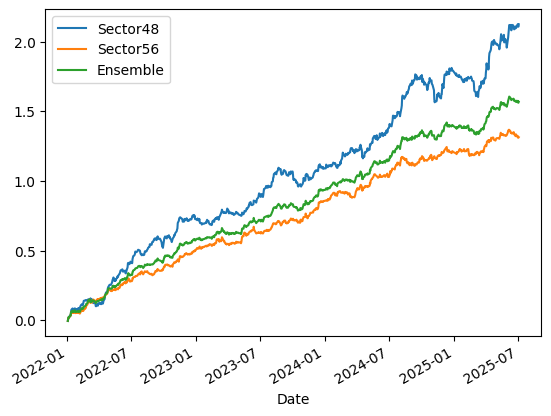

In [21]:
((df + 1).cumprod() - 1).plot()

In [ ]:
lasso_dataset = lasso46
lgbm_dataset = lgbm46
ml_dataset = en46

pred_result_df = lasso_dataset.get_pred_result()
lgbm_result_df = lgbm_dataset.get_pred_result()
#pred_result_df['Pred'] = pred_result_df['Pred'] * 6.7 + lgbm_result_df['Pred'] * 1.3

#pred_result_df = lgbm_dataset.get_pred_result()

ef46 = EvaluationFacade(pred_result_df,
                      lgbm_dataset.get_raw_target(), 
                      start_day = datetime(2022, 1, 1), 
                      end_day = datetime(2025, 12, 31),
                      bin_num=5,
                      trade_sector_num=1)
ef46.display()

c:\Users\ryosh\enrich_me\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\ryosh\enrich_me\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


読み込みが完了しました。
全期間
母集団の推定（99.7%）
平均リターン: 0.0986% (worst: 0.0295%, best: 0.1677%)
標準偏差: 0.006771 (worst:0.007293, best:0.006314)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.145608 (worst:0.040408, best:0.265646)
最大ドローダウン: 10.4631% (worst:40.6074%, best:5.3476%)
最大ドローダウン日数: 424日 (worst:5512日, best:128日)
----------------------------------------------------------------------------------
直近1年
母集団の推定（99.7%）
平均リターン: 0.0893% (worst: -0.0477%, best: 0.2263%)
標準偏差: 0.007255 (worst:0.008345, best:0.006398)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.123081 (worst:-0.057124, best:0.353634)
最大ドローダウン: 13.262% (worst:-32.8708%, best:4.0707%)
最大ドローダウン日数: 594日 (worst:2758日, best:72日)
----------------------------------------------------------------------------------
直近3ヶ月
母集団の推定（99.7%）
平均リターン: 0.2705% (worst: 0.0028%, best: 0.5382%)
標準偏差: 0.006878 (worst:0.009276, best:0.005408)
-----------------------------------------
モデルのスペック
シャープレシオ: 0.393304 (worst:0.003013, best:0

Output()

In [ ]:
import pandas as pd
df48_en = ef48_en.met_calc.metrics_dfs['日次成績'][['LS']].rename(columns={'LS': '48Sector'})
df54 = ef54.met_calc.metrics_dfs['日次成績'][['LS']].rename(columns={'LS': '54Sector'})
df46 = ef46.met_calc.metrics_dfs['日次成績'][['LS']].rename(columns={'LS': '46Sector'})
df = pd.concat([df48_en, df54, df46], axis=1).iloc[:-4]
df

,48Sector,54Sector,46Sector
Date,,,
2022-01-04,-0.007459,-0.003341,-0.003039
2022-01-05,0.019286,0.018703,0.012513
2022-01-06,0.009948,0.005345,0.007414
2022-01-07,-0.007367,-0.003334,0.007899
2022-01-11,0.002016,0.014972,0.018213
...,...,...,...
2025-06-12,0.001284,0.000613,0.000718
2025-06-13,-0.009444,-0.002545,0.003817
2025-06-16,-0.002401,0.000368,0.003236


In [ ]:
df['Merged'] = df['54Sector'] * 0.67 + df['48Sector'] * 0.33 + df['46Sector'] * 0
df_agg = df.describe().T
df_agg['SR'] = df_agg['mean']/ df_agg['std']
df_agg = df_agg.T
df_agg

,48Sector,54Sector,46Sector,Merged
count,846.000000,846.000000,846.000000,846.000000
mean,0.001250,0.001017,0.000993,0.001094
std,0.006595,0.004606,0.006778,0.004509
min,-0.024493,-0.019682,-0.026648,-0.021270
25%,-0.002601,-0.001724,-0.003142,-0.001435
50%,0.001412,0.000694,0.000708,0.000950
75%,0.004883,0.003651,0.004945,0.003561
max,0.028130,0.022855,0.043198,0.024228
SR,0.189549,0.220854,0.146441,0.242662


In [ ]:
df.corr()

,48Sector,54Sector,46Sector,Merged
48Sector,1.000000,0.451755,0.445279,0.755429
54Sector,0.451755,1.000000,0.474306,0.899917
46Sector,0.445279,0.474306,1.000000,0.690420
Merged,0.755429,0.899917,0.690420,1.000000


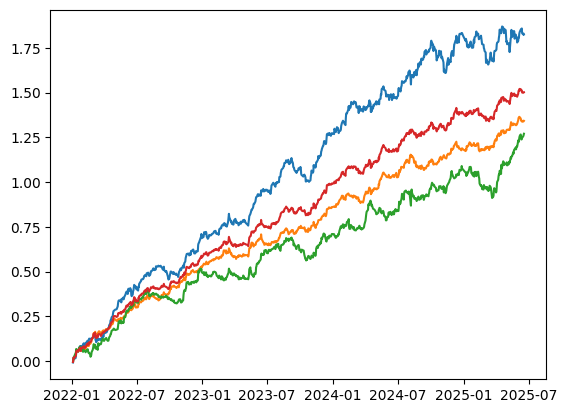

In [ ]:
import matplotlib.pyplot as plt

cumprod_df = (df + 1).cumprod() - 1
plt.plot(cumprod_df)